# Libraries

In [ ]:
!pip install fast-bert

     |████████████████████████████████| 92kB 8.6MB/s 
     |████████████████████████████████| 3.0MB 42.7MB/s 
     |████████████████████████████████| 317kB 55.1MB/s 
     |████████████████████████████████| 778kB 53.4MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 890kB 49.3MB/s 
     |████████████████████████████████| 1.2MB 52.5MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp36-none-any.whl size=16171 sha256=6a8be75245dc79db4587e15e8edf89811e8d6d1471bac12db468cfc684c7eab3
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=089ce54c11e9611ef4206ac0d7e627b8647906437968ddb1b52e4833f6a495b4
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built seqeval sacremoses


In [ ]:
!git clone https://github.com/NVIDIA/apex
%cd apex
!pip install -v --no-cache-dir ./

Cloning into 'apex'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7891 (delta 0), reused 0 (delta 0), pack-reused 7885
Receiving objects: 100% (7891/7891), 13.99 MiB | 28.19 MiB/s, done.
Resolving deltas: 100% (5385/5385), done.
/content/apex
Created temporary directory: /tmp/pip-ephem-wheel-cache-pv0daxx_
Created temporary directory: /tmp/pip-req-tracker-bk_tpv77
Created requirements tracker '/tmp/pip-req-tracker-bk_tpv77'
Created temporary directory: /tmp/pip-install-2kbisxzb
Processing /content/apex
  Created temporary directory: /tmp/pip-req-build-tlmsy7gb
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-bk_tpv77'
    Running setup.py (path:/tmp/pip-req-build-tlmsy7gb/setup.py) egg_info for package from file:///content/apex
    Running command python setup.py egg_info


    torch.__version__  = 1.7.0+cu101


    running egg_info
    creating /tmp/pip-req-build-tlms

# START

In [ ]:
import pandas as pd 
import numpy as np
import os

# Load data 
path = "/content/drive/MyDrive/TFG/Datasets_procesados_2/train/amazonEN_train.csv"
df = pd.read_csv(path)
df['star_rating'] = df['star_rating'].astype(str)

In [ ]:
label_cols = list(pd.get_dummies(df['star_rating']).columns)
with open(os.path.join("/content/drive/MyDrive/TFG", 'labels.csv'), 'w') as f:
    f.write('\n'.join(label_cols))

In [ ]:
#### SMALL DATASET PARA PRUEBAS ########

df_train = df.head(10000)
path2 = "/content/drive/MyDrive/TFG/Datasets_procesados_2/valid/amazonEN_valid.csv"
df_valid = pd.read_csv(path2)
df_valid = df_valid.head(500)

df_train.to_csv(r'/content/drive/MyDrive/TFG/train_small.csv',index = False)
df_valid.to_csv(r'/content/drive/MyDrive/TFG/valid_small.csv',index = False)

In [ ]:
from fast_bert.data_cls import BertDataBunch

DATA_PATH = "/content/drive/MyDrive/TFG"
LABEL_PATH= "/content/drive/MyDrive/TFG"

databunch = BertDataBunch(DATA_PATH, LABEL_PATH,
                          tokenizer='bert-base-uncased',
                          train_file='train_small.csv',
                          val_file='valid_small.csv',
                          label_file='labels.csv',
                          text_col='review_body',
                          label_col='star_rating',
                          batch_size_per_gpu=16,
                          max_seq_length=512,
                          multi_gpu=True,
                          multi_label=False,
                          model_type='bert-base')

In [ ]:
from fast_bert.learner_cls import BertLearner
from fast_bert.metrics import accuracy
from fast_bert.metrics import roc_auc, roc_curve
import logging
import torch 

logger = logging.getLogger()
device_cuda = torch.device("cuda")
metrics = [{'name': 'accuracy', 'function': accuracy},{'name': 'roc_auc', 'function':roc_auc }, {'name': 'roc_curve', 'function':roc_curve }]


OUTPUT_DIR = "/content/drive/MyDrive/TFG/Modelos_entrenados/fast-bert"


learner = BertLearner.from_pretrained_model(
						databunch,
						pretrained_path='bert-base-uncased',
						metrics=metrics,
						device=device_cuda,
						logger=logger,
						output_dir=OUTPUT_DIR,
						finetuned_wgts_path=None,
						warmup_steps=500,
						multi_gpu=True,
						is_fp16=True,
						multi_label=False,
						logging_steps=50)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): s3.amazonaws.com:443
DEBUG:urllib3.connectionpool:https://s3.amazonaws.com:443 "HEAD /models.huggingface.co/bert/bert-base-uncased-config.json HTTP/1.1" 200 0
INFO:transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-config.json from cache at /root/.cache/torch/transformers/4dad0251492946e18ac39290fcfe91b89d370fee250efe9521476438fe8ca185.7156163d5fdc189c3016baca0775ffce230789d7fa2a42ef516483e4ca884517
INFO:transformers.configuration_utils:Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": 

Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


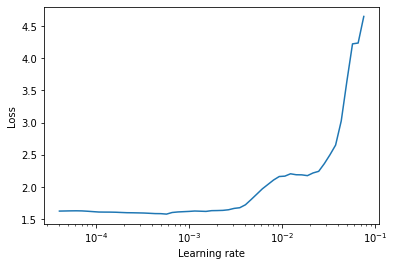

In [ ]:
learner.lr_find(start_lr=1e-5,optimizer_type='adamw')

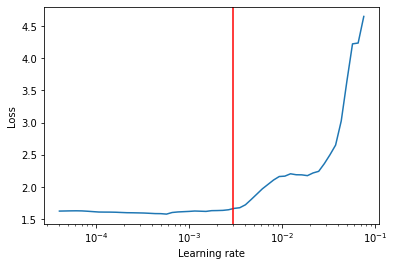

In [ ]:
learner.plot(show_lr=3e-3)

In [ ]:
learner.fit(epochs=2,
			lr=3e-3,        # Learning rate escogida como optima
			validate=True, 	# Evaluate the model after each epoch
			schedule_type="warmup_cosine",
			optimizer_type="adamw")

INFO:root:***** Running training *****
INFO:root:  Num examples = 10000
INFO:root:  Num Epochs = 2
INFO:root:  Total train batch size (w. parallel, distributed & accumulation) = 16
INFO:root:  Gradient Accumulation steps = 1
INFO:root:  Total optimization steps = 1250


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


RuntimeError: ignored

In [ ]:
learner.save_model()

In [ ]:
learner.validate()

{'accuracy': 0.166, 'loss': 1.6116642951965332}

# Language Model fine-tuning

Fine tune with the fastai's approach ULMFit based on your custom dataset. 

It creates a custom language model from your data and put it on top of a pretrained language model 


In [ ]:
# Language model Databunch
from fast_bert.data_lm import BertLMDataBunch
# Language model learner
from fast_bert.learner_lm import BertLMLearner

from pathlib import Path
from box import Box

In [ ]:
# Box is a nice wrapper to create an object from a json dict
args = Box({
    "seed": 42,
    "task_name": 'amazon_reviews_lm',
    "model_name": 'bert-base-uncased',
    "model_type": 'bert-base',
    "train_batch_size": 16,
    "learning_rate": 4e-5,
    "num_train_epochs": 20,
    "fp16": True,
    "fp16_opt_level": "O2",
    "warmup_steps": 1000,
    "logging_steps": 0,
    "max_seq_length": 512,
    "multi_gpu": True if torch.cuda.device_count() > 1 else False
})

DATA_PATH = Path('../lm_data/')
LOG_PATH = Path('../logs')
MODEL_PATH = Path('../lm_model_{}/'.format(args.model_type))

DATA_PATH.mkdir(exist_ok=True)
MODEL_PATH.mkdir(exist_ok=True)
LOG_PATH.mkdir(exist_ok=True)

In [ ]:
Databunch_lm = BertLMDataBunch.from_raw_corpus(
					data_dir=DATA_PATH,
					text_list=texts,
					tokenizer=args.model_name,
					batch_size_per_gpu=args.train_batch_size,
					max_seq_length=args.max_seq_length,
                    multi_gpu=args.multi_gpu,
                    model_type=args.model_type,
                    logger=logger)

In [ ]:
learner = BertLMLearner.from_pretrained_model(
							dataBunch=databunch_lm,
							pretrained_path=args.model_name,
							output_dir=MODEL_PATH,
							metrics=[],
							device=device,
							logger=logger,
							multi_gpu=args.multi_gpu,
							logging_steps=args.logging_steps,
							fp16_opt_level=args.fp16_opt_level)

In [ ]:
learner.fit(epochs=6,
			lr=6e-5,
			validate=True, 	# Evaluate the model after each epoch
			schedule_type="warmup_cosine",
			optimizer_type="lamb")

In [ ]:
learner.save_model()